## statsmodels
: 선형 회귀, 로지스틱 회귀 및 시계열 분석 등의 통계 검정이나 모델링과 관련된 풍부한 기능을 제공한다.

## patsy
: R과 같은 통계 소프트웨어에서 영감을 얻어 간단한 유형 언어로 통계 모델을 정의할 수 있는 기능을 제공한다.

## 1. 모듈 임포트

In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [83]:
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## 2. 통계 모델링 소개

## 3. Patsy를 이용한 통계 모델 정의

In [84]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [85]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -1.11022302e-15])

In [86]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x1 + x1*x2", data)

In [87]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [88]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [89]:
type(X)

patsy.design_info.DesignMatrix

In [90]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [91]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x1 + x1*x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [92]:
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [93]:
model = smf.ols("y ~ 1 + x1 + x1 + x1*x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [94]:
from collections import defaultdict
data = defaultdict(lambda: np.array([]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [95]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [96]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [97]:
patsy.dmatrices("y ~  a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [98]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [99]:
patsy.dmatrices("y ~ a * b * c -a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [100]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [101]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [102]:
patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names

['Intercept', 'a']

In [103]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [104]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [105]:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

In [106]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ -1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [107]:
patsy.dmatrices("y ~ -1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [108]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
patsy.dmatrices("y ~ -1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [109]:
patsy.dmatrices("y ~ -1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


## 3. 선형 회귀

In [110]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
  return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)

In [111]:
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e

In [112]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

In [113]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     79.31
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           3.89e-21
Time:                        03:25:39   Log-Likelihood:                -280.80
No. Observations:                 100   AIC:                             567.6
Df Residuals:                      97   BIC:                             575.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9852      0.408      2.416      0.0

In [114]:
result.rsquared

0.6205248822856162

In [115]:
result.resid.head()

0    2.568977
1    0.967939
2    1.290338
3   -5.986460
4    4.510301
dtype: float64

In [116]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.7374764191317674

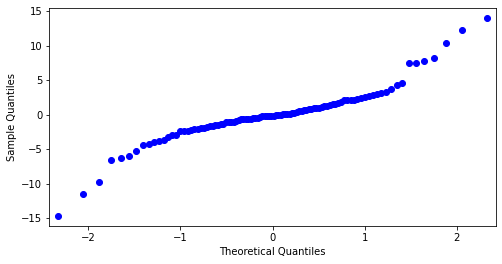

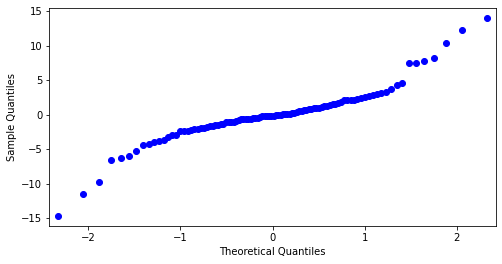

In [117]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [118]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5644.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.85e-108
Time:                        03:25:40   Log-Likelihood:                -70.334
No. Observations:                 100   AIC:                             148.7
Df Residuals:                      96   BIC:                             159.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0194      0.050     20.401      0.0

In [119]:
result.rsquared

0.994362645705824

In [120]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.0008817578341079907

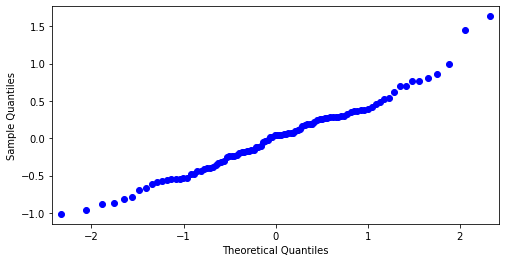

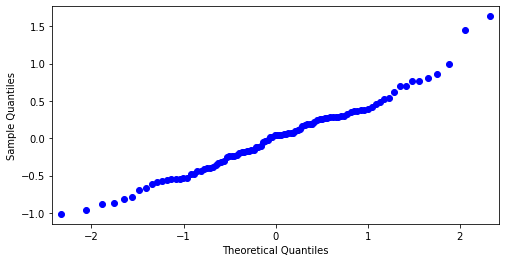

In [121]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [122]:
result.params

Intercept    1.019393
x1           1.966022
x2           2.983671
x1:x2        4.030866
dtype: float64

In [123]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [124]:
y_pred = result.predict(new_data)

In [125]:
y_pred.shape

(2500,)

In [126]:
y_pred = y_pred.values.reshape(50, 50)

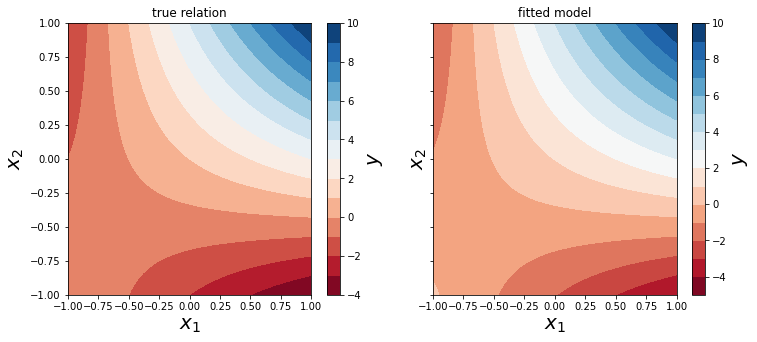

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
def plot_y_contour(ax, Y, title):
  c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
  ax.set_xlabel(r"$x_1$", fontsize=20)
  ax.set_ylabel(r"$x_2$", fontsize=20)
  ax.set_title(title)
  cb = fig.colorbar(c, ax=ax)
  cb.set_label(r"$y$", fontsize=20)
plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

### 예제 데이터셋

In [128]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [129]:
dataset.title

'Ice Cream Consumption'

In [130]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


In [131]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result = model.fit()

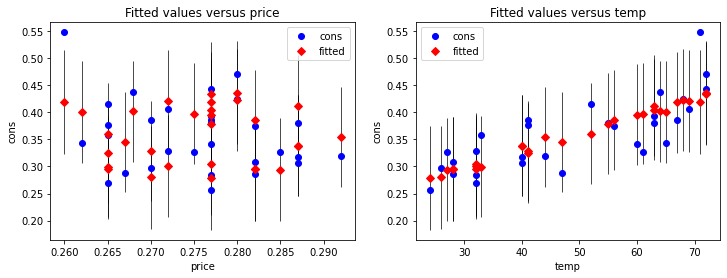

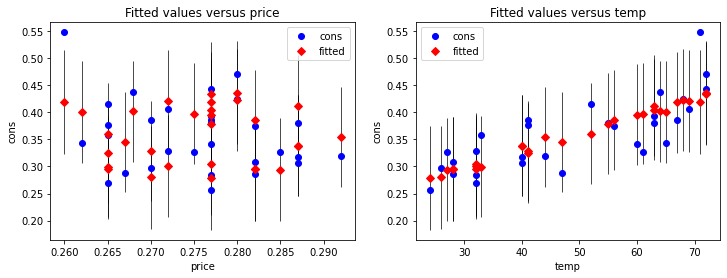

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

## 4. 이산 회귀 분석

### 로지스틱 회귀

In [133]:
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [134]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [135]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()   # 이항 변수 계산을 위한 부분 집합

In [136]:
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0}) # 각각의 이진 변수 생성

In [137]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
                          "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length",
                          "Petal.Width": "Petal_Width"},
                 inplace=True)
# rename: python 에서 유효한 (_) 기호로 변경

In [138]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [139]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [140]:
result = model.fit()  # fit: 모델을 공급된 데이터에 적합화 - 최대 우도 최적화

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [141]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Aug 2022   Pseudo R-squ.:                  0.8517
Time:                        03:25:44   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [142]:
print(result.get_margeff().summary())   # get_margeff: 모델에서의 각 설명 변수의 한계 영향 정보

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [143]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 +1.7})
df_new["P-Species"] = result.predict(df_new)   #새로운 설명 변숫값에 대한 반응 변숫값을 예측

In [144]:
df_new["P-Species"].head(3)
# 각 관측값이 반응 y=1에 해당할 확률을 가진 배열

0    0.000246
1    0.000590
2    0.977229
Name: P-Species, dtype: float64

In [145]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)   # 임계값 0.5와 비교하여 이진 반응 변수의 예측값 생성

In [148]:
params = result.params
# 매개변수 계산
alpha0 = -params['Intercept']/params['Petal_Width']  # 절편
alpha1 = -params['Petal_Length']/params['Petal_Width']  # 기울기

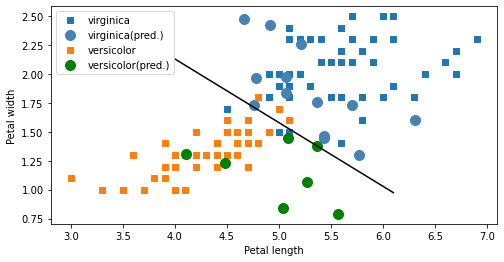

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# virginica 종
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values,
        's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica(pred.)')

# versicolor 종
ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values,
        's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor(pred.)')

# 경계선
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

# 적합화(사각), 예측(원) 데이터에 대한 산포도

### 푸아송 모델
: 낮은 성공 확률을 가진 다수의 시도 중, 성공한 횟수를 반응 변수로 가진 모델을 기술하는 프로세스.

In [154]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


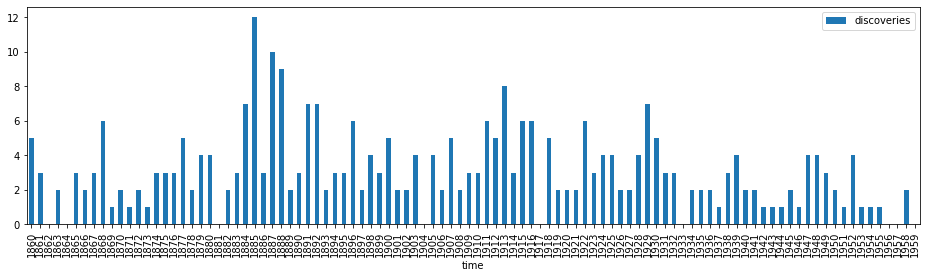

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)

In [156]:
model = smf.poisson("discoveries ~ 1", data=df) 

In [157]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [158]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Wed, 10 Aug 2022   Pseudo R-squ.:                   0.000
Time:                        03:47:04   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


In [159]:
lmbda = np.exp(result.params)   # 지수함수를 통한 푸아송 분포의 람다 매개변수

In [160]:
X = stats.poisson(lmbda)   # 푸아송 분포 확률 변수로 얻을 수 있는 이론적 계수

In [161]:
result.conf_int()   # conf_int: 신뢰구간 추정

,0,1
Intercept,1.020084,1.242721


In [162]:
# 푸아송 분포에 대한 데이터 적합성 평가
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])  # 신뢰구간의 하한에 대한 확률변수
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])  #     "      상한       "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


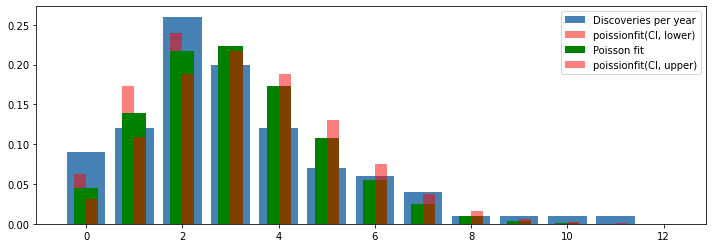

In [166]:
# 적합화된 모델 매개변수와 신뢰구간에 해당하는 푸아송 분포의 이론적 확률 질량 함수, 관측된 개수의 히스토그램
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue", align='center', label='Discoveries per year')
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='poissionfit(CI, lower)')
ax.bar(k, X.pmf(k), color="green", align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='poissionfit(CI, upper)')
ax.legend()

관측된 수(파랑)와 푸아송 확률 질량 함수는 매우 다르다.   
==> 푸아송 분포라는 기존 초기 가설은 기각돼야 한다.

## 5. 시계열

In [172]:
df = pd.read_csv("/temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

In [173]:
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

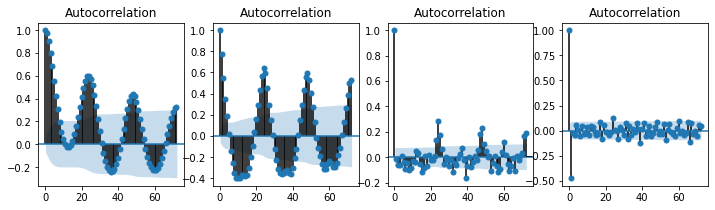

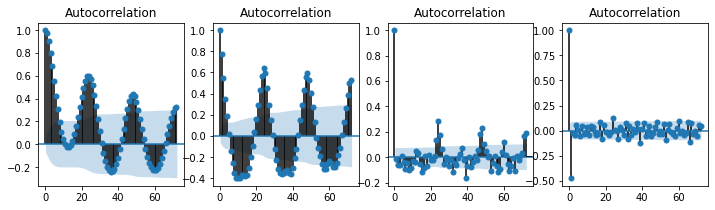

In [174]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])

In [175]:
model = sm.tsa.AR(df_march.temp)

In [176]:
result = model.fit(72)

In [177]:
sm.stats.durbin_watson(result.resid)

1.998562300635301

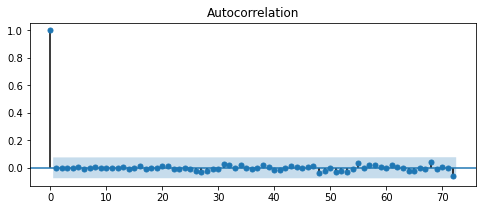

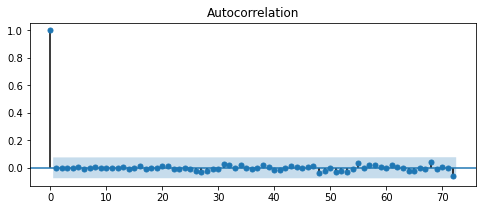

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)

In [179]:
temp_3d_forecast = result.predict("2014-04-01", "2014-04-04")

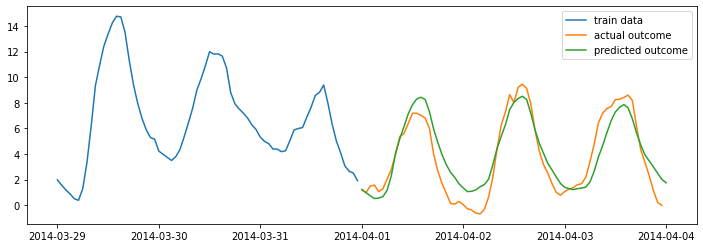

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-04", freq="H").values, temp_3d_forecast, label="predicted outcome")
ax.legend()